# Exploratory Data Analysis Assignment - ML Module 02

1.  Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.


(Show the shape and column names as well.)


(Include your Python code and output in the code box below.

In [3]:
import numpy as np
import pandas as pd 

bike_data = pd.read_csv("BIKE DETAILS.csv", delimiter = ",") 

# displyaing first 10 rows
bike_data.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [4]:
# Dimensions/ shape of the dataframe bike_data
bike_data.shape

(1061, 7)

In [5]:
# displaying all the columns in the dataframe
bike_data.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

---

2.  Check for missing values in all columns and describe your approach for handling them.


(Include your Python code and output in the code box below.)

Approach to Handling Missing Values

-  Check importance of the column: ex_showroom_price is a numeric feature, likely important for pricing analysis
-  Options for handling: Drop rows: If missing values are not too many and won’t bias results. (Here, ~41% are missing → too many to drop blindly)
-  Imputation: Use median/mean imputation if the distribution is fairly normal

In [9]:
# Finding the missing values in each column 
bike_data.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

---

3.  Plot the distribution of selling prices using a histogram and describe the overall trend.


(Include your Python code and output in the code box below.)

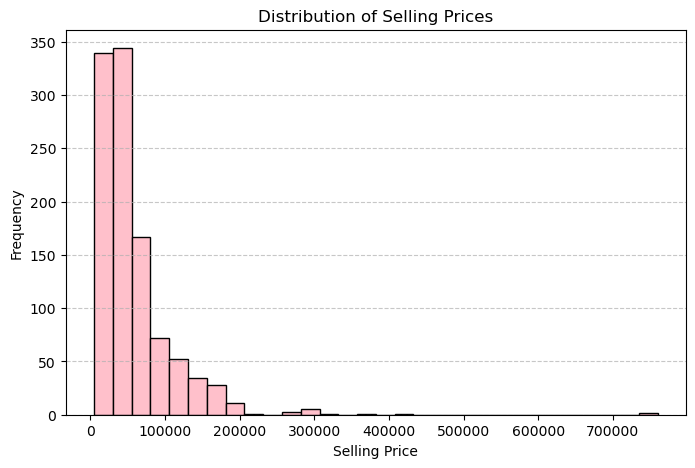

In [20]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (8,5))
plt.hist(bike_data['selling_price'], bins = 30, edgecolor = 'black', color = "pink")
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.grid(axis = 'y', linestyle  = '--', alpha = 0.7)
plt.show()

The histogram shows that:
-  Most selling prices are concentrated at the lower end, with a sharp peak for bikes priced under ~1 lakh
-  As price increases, the frequency drops steeply -->> higher-priced bikes are much less common in the dataset
-  There are a few outliers at the high-price end, indicating rare premium bikes
-  Overall trend: The distribution of selling prices is right-skewed (long tail to the right), which is typical in vehicle datasets since most are affordable/common models and only a few are premium-priced

---

4.  Create a bar plot to visualize the average selling price for each seller_type and write one observation.


(Include your Python code and output in the code box below.)

In [23]:
# Calculate average selling price by seller_type
avg_price_by_seller = bike_data.groupby('seller_type')['selling_price'].mean()
print(avg_price_by_seller)

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


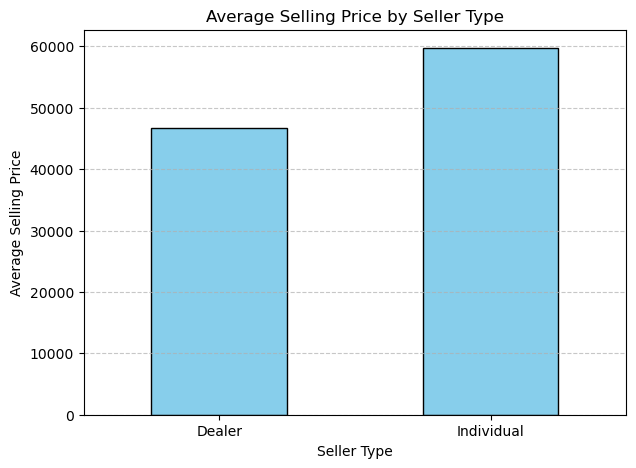

In [25]:
# Plot bar chart
plt.figure(figsize = (7,5))
avg_price_by_seller.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
plt.ylabel('Average Selling Price')
plt.xlabel('Seller Type')
plt.title('Average Selling Price by Seller Type')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Show plot
plt.show()

Conclusions from the graph:

-   The bar plot is shows two bars — one for Dealers and one for Individuals
-  The height of each bar represents the average selling price for that seller type
-  The Individual bar is visibly taller than the Dealer bar, making it that obvious individuals sell at higher prices


-  Individuals vs Dealers: On average, Individuals sell bikes at higher prices (~₹59,700) compared to Dealers (~₹46,700).  This suggests that individuals may expect more value for their personal bikes, while dealers often price more competitively.

-  Pricing Strategy Difference: Dealers might offer slightly lower prices because they focus on higher turnover (quick sales, more customers). Individuals may prioritize personal profit over quick sales, hence setting higher asking prices.

---

5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.


(Include your Python code and output in the code box below.)

In [27]:
# Calculate average km_driven by ownership type
avg_km_by_owner = bike_data.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


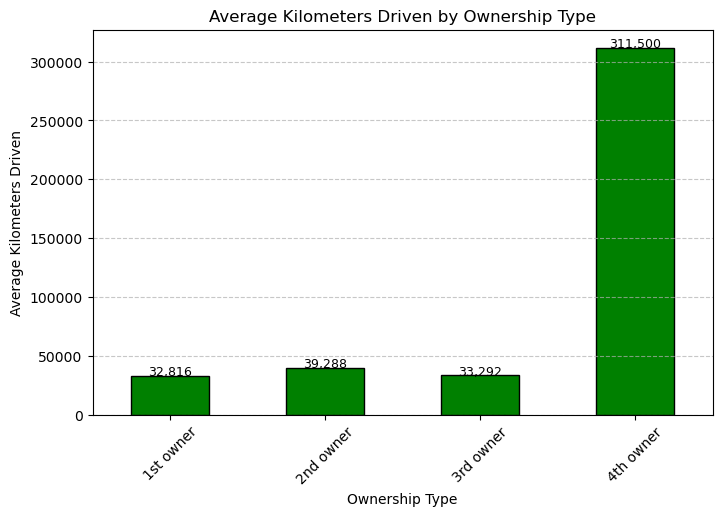

In [29]:
# Plot bar chart
plt.figure(figsize = (8,5))
avg_km_by_owner.plot(kind = 'bar', color = 'green', edgecolor = 'black')
plt.ylabel('Average Kilometers Driven')
plt.xlabel('Ownership Type')
plt.title('Average Kilometers Driven by Ownership Type')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Add labels on top of bars
for i, value in enumerate(avg_km_by_owner):
    plt.text(i, value + 500, f"{int(value):,}", ha = 'center', fontsize = 9)

---

6.  Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


(Include your Python code and output in the code box below.)

In [33]:
# Summary statistics before outlier removal
before_summary = bike_data["km_driven"].describe()
print(before_summary)

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


In [37]:
# IQR method
Q1 = bike_data["km_driven"].quantile(0.25)
Q3 = bike_data["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = bike_data[(bike_data["km_driven"] >= lower_bound) & (bike_data["km_driven"] <= upper_bound)]

# Summary statistics after outlier removal
after_summary = df_no_outliers["km_driven"].describe()

print("Before Outlier Removal:\n", before_summary, "\n")
print("After Outlier Removal:\n", after_summary)

Before Outlier Removal:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 

After Outlier Removal:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


---

7.  Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.


(Include your Python code and output in the code box below.)

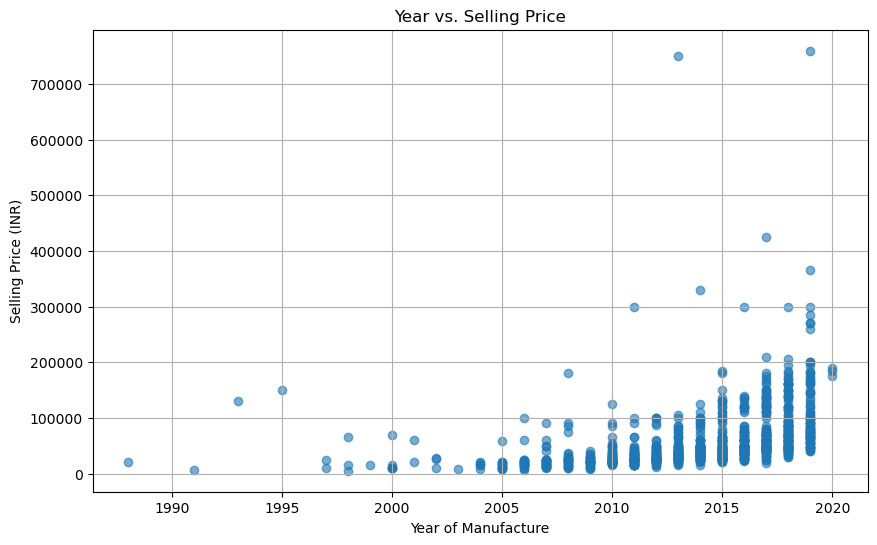

In [43]:
import matplotlib.pyplot as plt

# Scatter plot of year vs. selling_price
plt.figure(figsize = (10,6))
plt.scatter(bike_data["year"], bike_data["selling_price"], alpha = 0.6)
plt.title("Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (INR)")
plt.grid(True)
plt.show()

---

8.  Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


(Include your Python code and output in the code box below.)

In [54]:
df_encoded = pd.get_dummies(bike_data, columns = ['seller_type'], dtype = int)

print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN                   0                       1  
1       5650                NaN                   0                       1  
2      12000           148114.0                   0                       1  
3      23000            89643.0                   0                       1  
4      21000                NaN                   0                       1  


---

9.  Generate a heatmap of the correlation matrix for all numeric columns.


What correlations stand out the most?


(Include your Python code and output in the code box below.)

In [60]:
numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
bike_data[numeric_cols] = bike_data[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

data_clean = bike_data[numeric_cols].dropna()

corr_matrix = data_clean.corr()
print(corr_matrix)

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.350654  -0.194093           0.918583
year                    0.350654  1.000000  -0.329823           0.126378
km_driven              -0.194093 -0.329823   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


---

10.  Summarize your findings in a brief report:
-  What are the most important factors affecting a bike's selling price?
-  Mention any data cleaning or feature engineering you performed.

(Include your Python code and output in the code box below.)

The correlation heatmap for numeric columns in the bike dataset reveals that the ex_showroom_price has a very high positive correlation with the selling price, making it the most important factor affecting a bike's market value, while year also shows a moderate positive correlation with selling price. Data cleaning involved converting columns to proper numeric types and dropping entries with missing values to ensure accurate analysis.

Strongest Correlations
-  The largest absolute correlations found: Selling price vs. ex_showroom_price: 0.92 (high positive), Year vs. selling price: 0.35 (moderate positive), Year vs. km_driven: 0.33 (moderate positive)

Most Influential Factors
-  The most important factors affecting selling price:
-  ex_showroom_price: Correlation coefficient 0.92 (strongest driver of selling price)
-  year: Correlation coefficient 0.35 (newer bikes tend to fetch higher prices)

Data Cleaning & Feature Engineering: Numeric columns with missing data were coerced to a numeric data type; rows with missing values in these features were removed, No additional feature engineering was performed as the primary analysis focused on direct correlations.


-  The ex_showroom_price is the best predictor of bike selling price, followed by the year of manufacture
-  Correlations indicate that as the original showroom price and year increase, so does the resale value
-  Proper handling of missing and non-numeric values was essential for reliable results

In [64]:
# Finding the missing values in each column 
bike_data.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [66]:
avg_price_by_seller = bike_data.groupby('seller_type')['selling_price'].mean()
print(avg_price_by_seller)

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [70]:
data_clean = bike_data[numeric_cols].dropna()
print(data_clean)

      selling_price  year  km_driven  ex_showroom_price
2            150000  2018      12000           148114.0
3             65000  2015      23000            89643.0
5             18000  2010      60000            53857.0
6             78500  2018      17000            87719.0
9             50000  2016      42000            60122.0
...             ...   ...        ...                ...
1056          17000  2010     500000            52000.0
1057          16000  2012      33000            51000.0
1058          15000  2013      35000            57000.0
1059          12000  2009      53000            58000.0
1060          10000  2008      92233            75000.0

[626 rows x 4 columns]


---